In [1]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import plotly.express as px

import os


In [2]:
data = pd.read_csv("Airlines.csv")


In [3]:
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


Usuwany kolumnę id, ponieważ nam się nie przyda

In [4]:
data = data.drop(columns=["id"])

In [5]:
data.shape

(539383, 8)

In [6]:
data.describe()

,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,2427.928630,3.929668,802.728963,132.202007,0.445442
std,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,10.000000,0.000000,0.000000
25%,712.000000,2.000000,565.000000,81.000000,0.000000
50%,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,7814.000000,7.000000,1439.000000,655.000000,1.000000


<font size="6">Balans opóźnien</font>

In [7]:
data['Delay'].value_counts()


Delay
0    299119
1    240264
Name: count, dtype: int64

<font size="10">Sprawdzamy, które loty posiadają najwięcej opóźnień</font>

In [8]:
dt_df = data[['Airline','Delay']].groupby('Airline').agg('count').reset_index()
fig = px.bar(dt_df, x='Airline', y='Delay',template = 'plotly_dark')
fig.show()

<font size="10">Sprawdzamy, czy dzień w tygodniu ma wpływ na opóźnienia</font>

In [9]:
dt_df = data[['DayOfWeek','Delay']].groupby('DayOfWeek').agg('count').reset_index()
fig = px.bar(dt_df, x='DayOfWeek', y='Delay',template = 'plotly_dark')
fig.show()

<font size="10">Zamieniamy czas na godziny</font>

<Axes: xlabel='Length', ylabel='Count'>

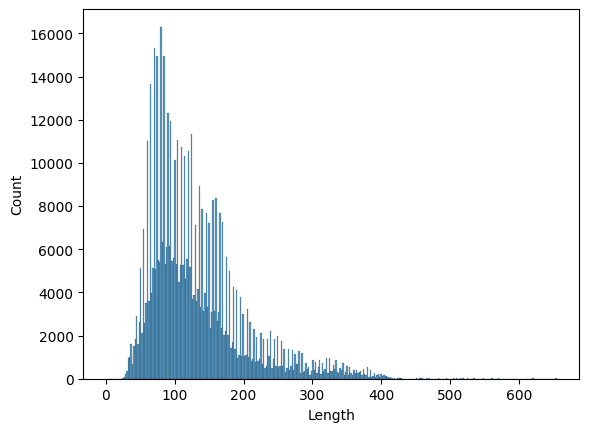

In [10]:
sns.histplot(data['Length'])

In [11]:
data['Length_by_hours'] = data['Length'] / 60
data['Time_by_hour'] = data['Time'] / 60


In [12]:
data.drop(columns=['Length', 'Time'], inplace=True)

<Axes: xlabel='Time_by_hour', ylabel='Count'>

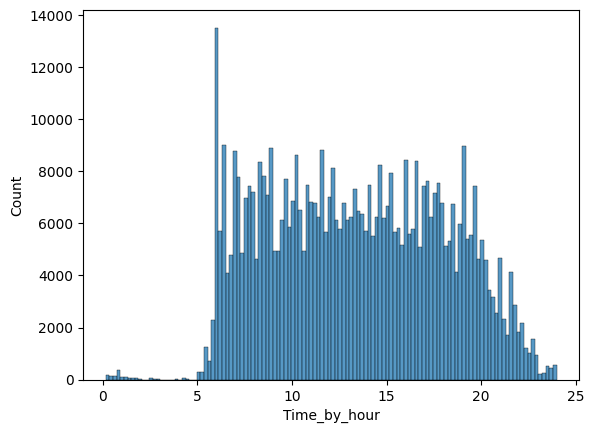

In [13]:
sns.histplot(data['Time_by_hour'])


<Axes: xlabel='Length_by_hours', ylabel='Count'>

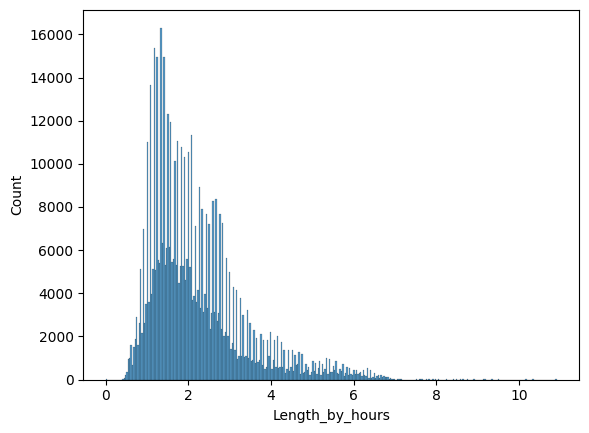

In [14]:
sns.histplot(data['Length_by_hours'])

<font size="10">Sprawdzamy, czy długość lotu ma wpływ na opoźnienie</font>

In [15]:
dt_df = data[['Length_by_hours','Delay']].groupby('Length_by_hours').agg('count').reset_index()
fig = px.bar(dt_df, x='Length_by_hours', y='Delay',template = 'plotly_dark')
fig.show()

In [16]:
data["Airline"].unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

<font size="10">Mapujemy lotniska</font>

In [17]:
airlines = data["Airline"].unique()
mapping = dict(zip(airlines,range(len(airlines))))
data["Airline"] = data["Airline"].map(mapping)
data

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Delay,Length_by_hours,Time_by_hour
0,0,269,SFO,IAH,3,1,3.416667,0.250000
1,1,1558,PHX,CLT,3,1,3.700000,0.250000
2,2,2400,LAX,DFW,3,1,2.750000,0.333333
3,2,2466,SFO,DFW,3,1,3.250000,0.333333
4,3,108,ANC,SEA,3,0,3.366667,0.500000
...,...,...,...,...,...,...,...,...
539378,0,178,OGG,SNA,5,0,5.433333,23.983333
539379,15,398,SEA,ATL,5,0,5.083333,23.983333
539380,15,609,SFO,MKE,5,0,4.250000,23.983333
539381,13,78,HNL,SFO,5,1,5.216667,23.983333


In [18]:
data["AirportFrom"].unique()

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

In [19]:
portFrom = data["AirportFrom"].unique()
mapping = dict(zip(portFrom,range(len(portFrom))))
data["AirportFrom"] = data["AirportFrom"].map(mapping)
data

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Delay,Length_by_hours,Time_by_hour
0,0,269,0,IAH,3,1,3.416667,0.250000
1,1,1558,1,CLT,3,1,3.700000,0.250000
2,2,2400,2,DFW,3,1,2.750000,0.333333
3,2,2466,0,DFW,3,1,3.250000,0.333333
4,3,108,3,SEA,3,0,3.366667,0.500000
...,...,...,...,...,...,...,...,...
539378,0,178,193,SNA,5,0,5.433333,23.983333
539379,15,398,21,ATL,5,0,5.083333,23.983333
539380,15,609,0,MKE,5,0,4.250000,23.983333
539381,13,78,11,SFO,5,1,5.216667,23.983333


In [20]:
data["AirportTo"].unique()

array(['IAH', 'CLT', 'DFW', 'SEA', 'MSP', 'DTW', 'ORD', 'ATL', 'PDX',
       'JFK', 'SLC', 'HNL', 'PHX', 'MCO', 'OGG', 'LAX', 'KOA', 'ITO',
       'SFO', 'MIA', 'IAD', 'SMF', 'PHL', 'LIH', 'DEN', 'LGA', 'MEM',
       'CVG', 'YUM', 'CWA', 'MKE', 'BQN', 'FAI', 'LAS', 'ANC', 'BOS',
       'LGB', 'FLL', 'SJU', 'EWR', 'DCA', 'BWI', 'RDU', 'MCI', 'TYS',
       'SAN', 'ONT', 'OAK', 'MDW', 'BNA', 'DAL', 'CLE', 'JAX', 'JNU',
       'RNO', 'ELP', 'SAT', 'OTZ', 'MBS', 'BDL', 'STL', 'HOU', 'AUS',
       'SNA', 'SJC', 'LIT', 'TUS', 'TUL', 'CMH', 'LAN', 'IND', 'AMA',
       'CRP', 'PIT', 'RKS', 'FWA', 'TPA', 'PBI', 'JAN', 'DSM', 'ADQ',
       'GRB', 'PVD', 'ABQ', 'SDF', 'RSW', 'MSY', 'BUR', 'BOI', 'TLH',
       'BHM', 'ACV', 'ORF', 'BET', 'KTN', 'RIC', 'SRQ', 'BTR', 'XNA',
       'MHT', 'GRR', 'SBN', 'SBA', 'ROA', 'CID', 'GPT', 'MFR', 'SGU',
       'HPN', 'OMA', 'OTH', 'GSP', 'LMT', 'BUF', 'MSN', 'BFL', 'CAE',
       'HRL', 'OKC', 'SYR', 'COS', 'BTV', 'CDC', 'SCC', 'DAY', 'SJT',
       'TVC', 'ROC',

In [21]:
portTo = data["AirportTo"].unique()
mapping = dict(zip(portTo,range(len(portTo))))
data["AirportTo"] = data["AirportTo"].map(mapping)
data

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Delay,Length_by_hours,Time_by_hour
0,0,269,0,0,3,1,3.416667,0.250000
1,1,1558,1,1,3,1,3.700000,0.250000
2,2,2400,2,2,3,1,2.750000,0.333333
3,2,2466,0,2,3,1,3.250000,0.333333
4,3,108,3,3,3,0,3.366667,0.500000
...,...,...,...,...,...,...,...,...
539378,0,178,193,63,5,0,5.433333,23.983333
539379,15,398,21,7,5,0,5.083333,23.983333
539380,15,609,0,30,5,0,4.250000,23.983333
539381,13,78,11,18,5,1,5.216667,23.983333


<font size="10">Sprawdzamy zależności do opóźnienia</font>

<Axes: >

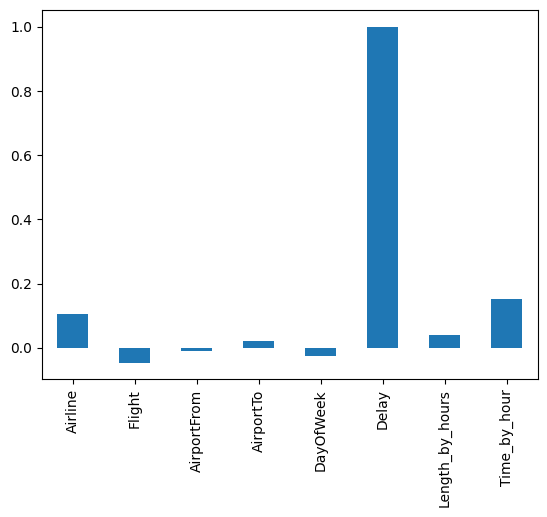

In [22]:
data.corr()["Delay"].plot.bar()

* Brak większych zależności, więc użyjemy wszystkich danych

In [23]:
x = data.drop("Delay",axis=1)
y = np.array(data["Delay"])

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


Dzielimy dane do trenowania i testowania

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

Trenujemy model LGBMClassifier, który jest wariantem GBM, oraz sprawdzamy jego precyzyjność

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
model = LGBMClassifier().fit(x_train,y_train)
prediction = model.predict(x_test)


print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

0.6583516412210202
              precision    recall  f1-score   support

           0       0.65      0.82      0.73     59768
           1       0.67      0.46      0.55     48109

    accuracy                           0.66    107877
   macro avg       0.66      0.64      0.64    107877
weighted avg       0.66      0.66      0.65    107877



Precyzyjność modelu wynosi około 66%